In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("C:\\Users\lyhe\Downloads\ccdefault.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
X = df.iloc[:,1:24].values
y = df.iloc[:,24].values

In [6]:
type(X)

numpy.ndarray

In [7]:
print(X.size)
print(y.size)

690000
30000


In [8]:
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

In [21]:
estimators = [20, 50, 100 ,200, 500]

In [31]:
for i in estimators:
    rfr = RandomForestClassifier(n_estimators = i, n_jobs=-1)
    scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

    print(scores.mean(), scores.std() * 1.96)

0.8115933400905359 0.011222137216634093
0.8155563721842304 0.013034956453719996
0.815259787756004 0.010181014654835329
0.8157408440939022 0.010512914923572557
0.8168152886247665 0.011740088808839089


In [13]:
%%time 
rfr = RandomForestClassifier(n_estimators = 20, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.811258470466792 0.012675061971525915
Wall time: 10.1 s


In [14]:
%%time 
rfr = RandomForestClassifier(n_estimators = 50, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.8161848220443539 0.013809500359826522
Wall time: 12.9 s


In [15]:
%%time 
rfr = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.8165920786566383 0.011876132528975349
Wall time: 27.8 s


In [16]:
%%time 
rfr = RandomForestClassifier(n_estimators = 200, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.8180737112990407 0.013890615482240512
Wall time: 45.2 s


In [17]:
%%time 
rfr = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.8174443147081061 0.013208588053132391
Wall time: 2min 22s


In [18]:
Wall_time = [10.1, 12.9, 27.8, 45.2, 142]

In [19]:
import matplotlib.pyplot as plt

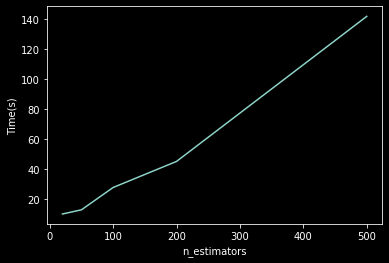

In [63]:
plt.plot(estimators, Wall_time)
plt.xlabel('n_estimators')
plt.ylabel('Time(s)')
plt.show()

In [23]:
rfr = RandomForestClassifier(n_estimators = 200, n_jobs=-1)
scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)

print(scores.mean(), scores.std() * 1.96)

0.8165920923689809 0.011324772907633378


In [24]:
rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
importance = rfr.feature_importances_
print(importance)

[0.05923562 0.01209183 0.02056389 0.01408807 0.06656727 0.0972234
 0.04293533 0.03095782 0.02165693 0.01995019 0.01893353 0.06069323
 0.05473106 0.0518422  0.05043915 0.05005914 0.05036993 0.05207257
 0.04790625 0.04574793 0.04304819 0.04299524 0.04589126]


In [29]:
sorted_index = np.argsort(importance)
print(sorted_index)

[ 1  3 10  9  2  8  7  6 21 20 19 22 18 15 16 14 13 17 12  0 11  4  5]


In [36]:
labels = list(df.columns.values)[1:24]

In [48]:
xlabels = []
sorted_imp = []
for i in sorted_index:
    xlabels.append(labels[i])
    sorted_imp.append(importance[i])

In [72]:
x = range(len(labels))
print(sorted_imp)

[0.012091829955850774, 0.014088068633182462, 0.018933530817178974, 0.0199501863968483, 0.02056388534368876, 0.021656926503836462, 0.03095781758513662, 0.04293532999693338, 0.04299523979642336, 0.04304818639283976, 0.04574792826522257, 0.0458912618296189, 0.047906245699303594, 0.05005913728823454, 0.050369932451922714, 0.0504391492641569, 0.05184220011362503, 0.05207256597653015, 0.054731058349248636, 0.05923562299366082, 0.060693228529188244, 0.06656726965721674, 0.09722339816015216]


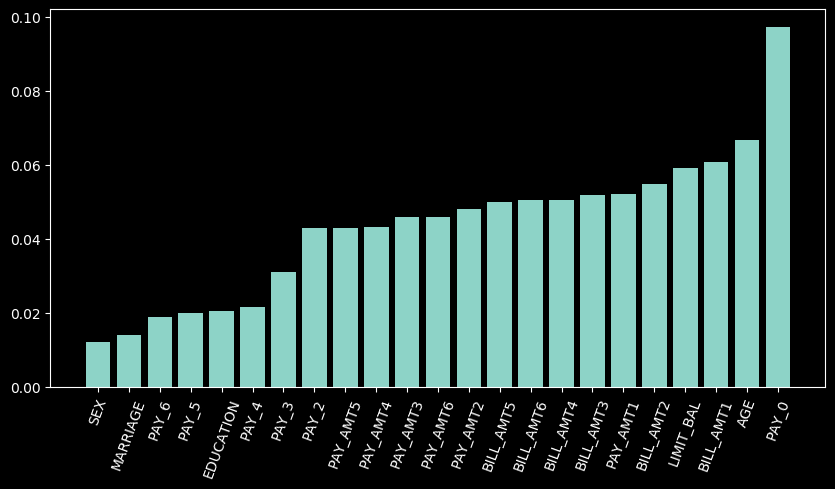

In [62]:
plt.figure(figsize=(10,5), dpi = 100)
plt.bar(x, sorted_imp)
plt.xticks(x, xlabels, rotation=70)
plt.show()

In [65]:
y_pred = rfr.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [68]:
test_acc = accuracy_score(y_test, y_pred)
print(test_acc)

0.8076666666666666


In [71]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[2176  142]
 [ 435  247]]
